<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Preprocess-Into-Interactions-(Recommend-or-Not)" data-toc-modified-id="Preprocess-Into-Interactions-(Recommend-or-Not)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocess Into Interactions (Recommend or Not)</a></span><ul class="toc-item"><li><span><a href="#Split-into-5-fold-(more-like-4)-by-Time" data-toc-modified-id="Split-into-5-fold-(more-like-4)-by-Time-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split into 5 fold (more like 4) by Time</a></span></li><li><span><a href="#Build-the-user-item-sparse-matrix-(for-factorization)" data-toc-modified-id="Build-the-user-item-sparse-matrix-(for-factorization)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Build the user-item sparse matrix (for factorization)</a></span></li><li><span><a href="#Build-[user_id,-item_id]-[count]-set-for-training-NCF-and-Testing" data-toc-modified-id="Build-[user_id,-item_id]-[count]-set-for-training-NCF-and-Testing-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Build [user_id, item_id] [count] set for training NCF and Testing</a></span></li><li><span><a href="#Sampled-Negative-Example-for-Training-and-Testing" data-toc-modified-id="Sampled-Negative-Example-for-Training-and-Testing-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sampled Negative Example for Training and Testing</a></span></li></ul></li><li><span><a href="#LightFM-(Matrix-Factorization)" data-toc-modified-id="LightFM-(Matrix-Factorization)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LightFM (Matrix Factorization)</a></span><ul class="toc-item"><li><span><a href="#Results-Explanation" data-toc-modified-id="Results-Explanation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Results Explanation</a></span></li></ul></li><li><span><a href="#Tensorflow-Neural-Collaborative-Filtering-(NCF)" data-toc-modified-id="Tensorflow-Neural-Collaborative-Filtering-(NCF)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tensorflow Neural Collaborative Filtering (NCF)</a></span><ul class="toc-item"><li><span><a href="#Using-Matrix-Factorization-and-Multi-Layer-Perceptron-Approach" data-toc-modified-id="Using-Matrix-Factorization-and-Multi-Layer-Perceptron-Approach-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using Matrix Factorization and Multi-Layer Perceptron Approach</a></span></li><li><span><a href="#NCF-Result" data-toc-modified-id="NCF-Result-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>NCF Result</a></span></li></ul></li><li><span><a href="#Youtube-Recommendation-System" data-toc-modified-id="Youtube-Recommendation-System-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Youtube Recommendation System</a></span><ul class="toc-item"><li><span><a href="#Candidate-Selection" data-toc-modified-id="Candidate-Selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Candidate Selection</a></span><ul class="toc-item"><li><span><a href="#Approximate-Nearest-Neighbor-with-Matrix-Factorization" data-toc-modified-id="Approximate-Nearest-Neighbor-with-Matrix-Factorization-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Approximate Nearest Neighbor with Matrix Factorization</a></span></li><li><span><a href="#Approximate-Nearest-Neighbor-with-NCF" data-toc-modified-id="Approximate-Nearest-Neighbor-with-NCF-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>Approximate Nearest Neighbor with NCF</a></span></li></ul></li><li><span><a href="#Ranking" data-toc-modified-id="Ranking-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Ranking</a></span><ul class="toc-item"><li><span><a href="#Create-a-User-Item-History-based-on-the-training-dataset" data-toc-modified-id="Create-a-User-Item-History-based-on-the-training-dataset-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Create a User-Item History based on the training dataset</a></span></li><li><span><a href="#Recommender-Function" data-toc-modified-id="Recommender-Function-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Recommender Function</a></span></li><li><span><a href="#MF-Candidate-and-NCF-Ranking-Performance" data-toc-modified-id="MF-Candidate-and-NCF-Ranking-Performance-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>MF Candidate and NCF Ranking Performance</a></span></li><li><span><a href="#NCF-Only-Recommender-Performance" data-toc-modified-id="NCF-Only-Recommender-Performance-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>NCF Only Recommender Performance</a></span></li><li><span><a href="#How-to-Use" data-toc-modified-id="How-to-Use-5.2.5"><span class="toc-item-num">5.2.5&nbsp;&nbsp;</span>How-to-Use</a></span></li></ul></li></ul></li></ul></div>

# Background

This is an experiment notebook of recreating a simplified version of the Youtube Recommendation Algorithm  
I am aware it is a better idea to denote a score for each item, making recommendations more accurate and easier to perform.  
But I have never done binary recommendation...so I kinda wanna try it out...never do it again though  
Also, this dataset is about the internet browsing history...Not exactly easy even at the best of time.  Let's just say there is a reason why Google didn't create a recommendation for the internet  

# Preprocess Into Interactions (Recommend or Not)

In [1]:
import pandas as pd
from util import *
import numpy as np
from scipy.sparse import coo_matrix

In [2]:
footprint = pd.read_csv("techtest_footprint.csv")
footprint['date'] = pd.to_datetime(footprint['HKT'])
print("Maximum Date:", max(footprint['date']))
print("Minimum Date:", min(footprint['date']))

Maximum Date: 2020-09-20 00:00:00
Minimum Date: 2020-08-26 00:00:00


## Split into 5 fold (more like 4) by Time 

In [3]:
train_footprint = footprint[footprint['date'] < '2020-09-16']
test_footprint = footprint[footprint['date'] >= '2020-09-16']

print(f"""Train Size: {len(train_footprint)}
Test Size: {len(test_footprint)}""")

train_footprint = train_footprint[['hmid', 'webUrl', 'count']]
test_footprint = test_footprint[['hmid', 'webUrl', 'count']]

train_footprint = train_footprint.groupby(['hmid', 'webUrl']).sum().reset_index()
train_footprint['count'] = train_footprint['count'].apply(lambda x: 1 if x > 0 else -1)

test_footprint = test_footprint.groupby(['hmid', 'webUrl']).sum().reset_index()
test_footprint['count'] = test_footprint['count'].apply(lambda x: 1 if x > 0 else -1)
test_footprint.head()

Train Size: 2259614
Test Size: 836128


,hmid,webUrl,count
0,00007bfd9cd4448cba33270f9d821f65,https://today.line.me,1
1,00007bfd9cd4448cba33270f9d821f65,https://today.line.me/hk/v2/article/MowVgM,1
2,00007bfd9cd4448cba33270f9d821f65,https://today.line.me/hk/v2/main,1
3,0002be6911074154bd05d61259d4d028,https://today.line.me/hk/v2/article/3分鐘精華🍎Appl...,1
4,0002be6911074154bd05d61259d4d028,https://today.line.me/hk/v2/article/台藝人「小鬼」黃鴻升...,1


## Build the user-item sparse matrix (for factorization)

In [4]:
from sklearn.preprocessing import LabelEncoder

user_id_encoder = LabelEncoder().fit(footprint['hmid'].unique())
item_id_encoder = LabelEncoder().fit(footprint['webUrl'].unique())

train_footprint['user_id'] = user_id_encoder.transform(train_footprint['hmid'])
train_footprint['item_id'] = item_id_encoder.transform(train_footprint['webUrl'])
test_footprint['user_id'] = user_id_encoder.transform(test_footprint['hmid'])
test_footprint['item_id'] = item_id_encoder.transform(test_footprint['webUrl'])

train_data = train_footprint[['user_id', 'item_id', 'count']]

# Convert the training data to a sparse matrix
train_matrix = coo_matrix(
    (train_footprint['count'], (train_footprint['user_id'], train_footprint['item_id'])),
    shape = [len(user_id_encoder.classes_), len(item_id_encoder.classes_)]
)
train_matrix = train_matrix.tocsr()
train_matrix

<54157x618059 sparse matrix of type '<class 'numpy.int64'>'
	with 1636747 stored elements in Compressed Sparse Row format>

## Build [user_id, item_id] [count] set for training NCF and Testing

In [7]:
from multiprocessing import Pool
import pandas as pd
import random
from tqdm import tqdm

def generate_neg_items(user, user_df, unique_items, sample_count = None):
    if sample_count is None: sample_count = len(user_df)
        
    items_not_present = random.sample(
        list(unique_items - set(user_df['item_id'].unique())),
        sample_count
    )
    return [user, items_not_present]

def add_negative_samples(train_footprint, test_footprint = None):
    if test_footprint is None:
        footprint = train_footprint
    else:
        footprint = pd.concat([train_footprint, test_footprint])
    unique_users = footprint['user_id'].unique()
    unique_items = set(footprint['item_id'].unique())
    
    results = list()
    neg_footprint_list = list()
    for u in tqdm(unique_users):
        if test_footprint is None:
            neg_user, neg_items = generate_neg_items(
                u, footprint[footprint['user_id'] == u], unique_items
            )
        else:
            neg_user, neg_items = generate_neg_items(
                u, 
                footprint[footprint['user_id'] == u], 
                unique_items,
                len(test_footprint[test_footprint['user_id'] == u])
            )
        for neg_item in neg_items:
            neg_footprint_list.append({
                "user_id": neg_user,
                "item_id": neg_item,
                "count": 0
            })
    neg_footprint = pd.DataFrame(neg_footprint_list)
    return neg_footprint #pd.concat([footprint, neg_footprint])

test_footprint_neg = add_negative_samples(train_footprint, test_footprint)
test_footprint_with_neg = pd.concat([test_footprint, test_footprint_neg])
train_footprint_neg = add_negative_samples(train_footprint)
train_footprint_with_neg = pd.concat([train_footprint, train_footprint_neg])

100%|████████████████████████████████████████████████████████████████████████████| 52367/52367 [17:52<00:00, 48.81it/s]


## Sampled Negative Example for Training and Testing

In [8]:
print("Train Pos/Neg Split:")
print(train_footprint_with_neg['count'].value_counts())
print("\nTest Pos/Neg Split:")
print(test_footprint_with_neg['count'].value_counts())

train_footprint_with_neg.to_csv("train_footprint_with_neg.csv")
test_footprint_with_neg.to_csv("test_footprint_with_neg.csv")

Train Pos/Neg Split:
count
1    1636747
0    1636747
Name: count, dtype: int64

Test Pos/Neg Split:
count
1    686737
0    686737
Name: count, dtype: int64


# LightFM (Matrix Factorization)

In [7]:
test_footprint_with_neg = pd.read_csv("test_footprint_with_neg.csv")

In [11]:
from lightfm import LightFM

model = LightFM(no_components=50, loss='warp')
model.fit(train_matrix)

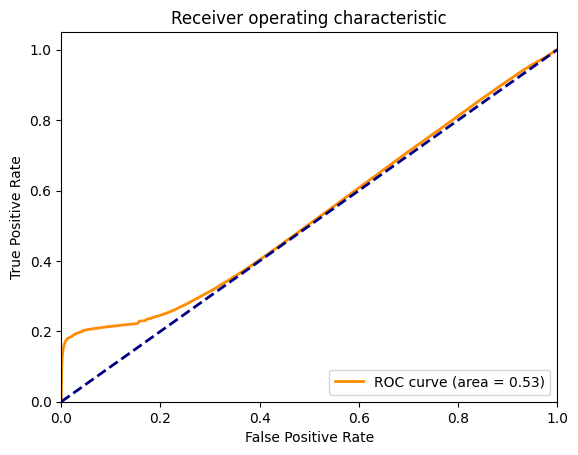

In [12]:
y_score = model.predict(
    test_footprint_with_neg.user_id.tolist(), 
    test_footprint_with_neg.item_id.tolist()
)
fpr, tpr, thresholds = draw_roc_curve(
    test_footprint_with_neg['count'].tolist(), 
    y_score
)

## Results Explanation

So basically the chart aboves says the recommendation is able to make some good recommendations that everyone would visit at 20% True Positive and 0% False Positive. I mean that's nice and all, but those 20% are essentially homepages of large publication sites...so you really don't need to recommend them.

# Tensorflow Neural Collaborative Filtering (NCF)

In [9]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Flatten, Input, Dot, Concatenate, Dropout, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

## Using Matrix Factorization and Multi-Layer Perceptron Approach

In [19]:
latent_dim = 10

# Define inputs
item_input = Input(shape=[1],name='item-input')
user_input = Input(shape=[1], name='user-input')

# MLP Embeddings
item_embedding_mlp = Embedding(len(item_id_encoder.classes_) + 1, latent_dim, name='item-embedding-mlp')(item_input)
item_vec_mlp = Flatten(name='flatten-item-mlp')(item_embedding_mlp)

user_embedding_mlp = Embedding(len(user_id_encoder.classes_) + 1, latent_dim, name='user-embedding-mlp')(user_input)
user_vec_mlp = Flatten(name='flatten-user-mlp')(user_embedding_mlp)

# MF Embeddings
item_embedding_mf = Embedding(len(item_id_encoder.classes_) + 1, latent_dim, name='item-embedding-mf')(item_input)
item_vec_mf = Flatten(name='flatten-item-mf')(item_embedding_mf)

user_embedding_mf = Embedding(len(user_id_encoder.classes_) + 1, latent_dim, name='user-embedding-mf')(user_input)
user_vec_mf = Flatten(name='flatten-user-mf')(user_embedding_mf)

# MLP layers
concat = Concatenate(name='concat')([item_vec_mlp, user_vec_mlp])
concat_dropout = Dropout(0.2)(concat)
fc_1 = Dense(64, name='fc-1', activation='relu')(concat_dropout)
fc_1_bn = BatchNormalization(name='batch-norm-1')(fc_1)
fc_1_dropout = Dropout(0.2)(fc_1_bn)
fc_2 = Dense(32, name='fc-2', activation='relu')(fc_1_dropout)
fc_2_bn = BatchNormalization(name='batch-norm-2')(fc_2)
fc_2_dropout = Dropout(0.2)(fc_2_bn)

# Prediction from both layers
pred_mlp = Dense(16, name='pred-mlp', activation='relu')(fc_2_dropout)
pred_mf = Dot(axes = 1, name='pred-mf')([item_vec_mf, user_vec_mf])
combine_mlp_mf = Concatenate(name='mf_mlp')([pred_mf, pred_mlp])

# Final prediction
result = Dense(1, name='result', activation='sigmoid')(combine_mlp_mf)

model = Model([user_input, item_input], result)
model.compile(optimizer=Adam(lr=0.01), loss='mean_absolute_error')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 user-input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 item-embedding-mlp (Embedding)  (None, 1, 10)       6180600     ['item-input[0][0]']             
                                                                                                  
 user-embedding-mlp (Embedding)  (None, 1, 10)       541580      ['user-input[0][0]']             
                                                                                            

In [20]:
train_footprint_with_neg = pd.read_csv("train_footprint_with_neg.csv")

train_user_id = np.expand_dims(train_footprint_with_neg.user_id.to_numpy(), axis = 1)
train_item_id = np.expand_dims(train_footprint_with_neg.item_id.to_numpy(), axis = 1)
train_count = train_footprint_with_neg['count'].to_numpy()

model.fit(x = [train_user_id, train_item_id], y = train_count, epochs = 1)

C:\Users\wongh\AppData\Local\Temp\ipykernel_23768\556159156.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  train_footprint_with_neg = pd.read_csv("train_footprint_with_neg.csv")


102297/102297 [==============================] - 1485s 15ms/step - loss: 0.3655


In [22]:
tf.keras.models.save_model(model, 'ncf_internet_small.h5')

## NCF Result

C:\Users\wongh\AppData\Local\Temp\ipykernel_23768\995263654.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  test_footprint_with_neg = pd.read_csv("test_footprint_with_neg.csv")


42922/42922 [==============================] - 103s 2ms/step


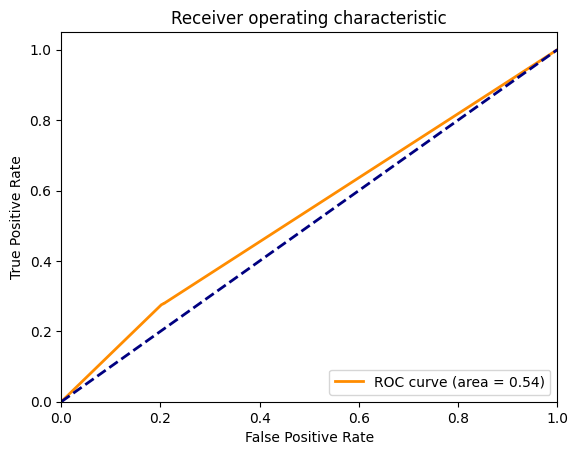

In [23]:
test_footprint_with_neg = pd.read_csv("test_footprint_with_neg.csv")
test_count = test_footprint_with_neg['count'].to_numpy()

y_scores = model.predict([
    test_footprint_with_neg.user_id.to_numpy(), 
    test_footprint_with_neg.item_id.to_numpy()
])
_, _, _ = draw_roc_curve(test_count, y_scores)

# Youtube Recommendation System

![yt-recommendation-system](public/Youtube_Recommendation_Algorithm.png)

YT's recommendation system is split into 2 parts
1. **Candidate Selection**: A few examples are first selected based on the recent activities of users (and some other factors, such as gender and nationality). We replicate candidate selection by using the embedding of items and approximate nearest neighbor algorithm (ANN). Youtube uses a Multi-layer Perception for this but, well, it is a bit too expensive for most use cases.
2. **Ranking**: The selected examples are ranked and shown to users based on the order of confidence. We use a deep learning model built for Neural Collaborative Filtering (NCF). This is considerbly slower than matrix factorization, but it gives more robust result as shown above.

## Candidate Selection

### Approximate Nearest Neighbor with Matrix Factorization

In [2]:
from pynndescent import NNDescent
import numpy as np

"""
lightfm_item_embedding = model.get_item_representations()[1]
np.save(
    "lightfm_item_embedding.npy", 
    lightfm_item_embedding, 
    allow_pickle=True
)
"""
lightfm_item_embedding = np.load("lightfm_item_embedding.npy", allow_pickle=True)
light_fm_ann = NNDescent(lightfm_item_embedding)

lightfm_item_embedding.shape

(618059, 50)

### Approximate Nearest Neighbor with NCF

In [4]:
import tensorflow as tf

model = tf.keras.models.load_model('ncf_internet_small.h5')

item_embedding_mlp = model.get_layer("item-embedding-mlp").get_weights()[0]
item_embedding_mf = model.get_layer("item-embedding-mf").get_weights()[0]

ncf_item_embedding = np.concatenate(
    [item_embedding_mlp, item_embedding_mf],
    axis = 1
)

ncf_item_ann = NNDescent(ncf_item_embedding)

ncf_item_embedding.shape

(618060, 20)

## Ranking

### Create a User-Item History based on the training dataset

In [7]:
import pandas as pd

train_footprint_with_neg = pd.read_csv("train_footprint_with_neg.csv")
grouped = train_footprint_with_neg.groupby('user_id')['item_id'].apply(set)
user_history = {user: list(items) for user, items in grouped.items()}

C:\Users\wongh\AppData\Local\Temp\ipykernel_17748\986120948.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  train_footprint_with_neg = pd.read_csv("train_footprint_with_neg.csv")


### Recommender Function

In [18]:
from tqdm import tqdm
from collections import defaultdict

class Candidate_Ranking:
    def __init__(
        self,
        nn_model,
        ncf_model,
        item_embedding,
        user_history
    ):
        self.nn_model = nn_model
        self.ncf_model = ncf_model
        self.item_embedding = item_embedding
        self.user_history = user_history
        
    def predict_testing(self, user_ids, item_ids):
        output_list = list()
        pending_user = list()
        pending_item = list()
        for user, item in tqdm(zip(user_ids, item_ids), total = len(user_ids)):
            user_item_history = self.user_history.get(user, [])
            if item in user_item_history:
                output_list.append(1.0)
            else:
                nn_lists = self.nn_model.query(self.item_embedding[user_item_history], k = 100)[0]
                flat_list = [item for sublist in nn_lists for item in sublist]
                candidate_set = set(flat_list) - set(user_item_history)

                if item not in candidate_set:
                    output_list.append(0.0)
                else:
                    output_list.append(None)
                    pending_user.append(user)
                    pending_item.append(item)
        
        y_scores = self.ncf_model.predict([
            np.array(pending_user), 
            np.array(pending_item)
        ])
        
        return self._combine_lists(output_list, [score_array[0] for score_array in y_scores])
        
    def _combine_lists(self, list1, list2):
        """
        Combines list1 and list2, with list2 filling in the None values in list1.
        Assumes that the number of None values in list1 is equal to the length of list2.
        """
        # Ensure that the number of None values in list1 is equal to the length of list2
        if list1.count(None) != len(list2):
            raise ValueError("The number of Nones in list1 is not equal to the length of list2.")

        # Create a copy of list1 to avoid modifying the original list
        combined_list = list(list1)

        # Iterate over the indices of list1
        for i in range(len(list1)):
            # If the value at the current index is None, replace it with the next value in list2
            if combined_list[i] is None:
                combined_list[i] = list2.pop(0)

        return combined_list
        
    def recommend(self, user_id, item_history = None):
        if item_history is None: item_history = self.user_history.get(user_id, [])
            
        nn_lists = self.nn_model.query(self.item_embedding[item_history], k = 100)[0]
        flat_list = [item for sublist in nn_lists for item in sublist]
        candidate_set = set(flat_list) - set(item_history)
        print(f"Candidate Size: {len(candidate_set)}")
        candidate_scores = self.ncf_model.predict(
            [np.array([user_id]*len(candidate_set)), np.array(list(candidate_set))], 
            verbose = 0
        )
        
        sorted_pairs = sorted(zip(candidate_set, candidate_scores), key=lambda x: -x[1])
        return [pair[0] for pair in sorted_pairs]

### MF Candidate and NCF Ranking Performance

100%|██████████████████████████████████████████████████████████████████████████████| 1373/1373 [01:40<00:00, 13.71it/s]

2/2 [==============================] - 0s 3ms/step


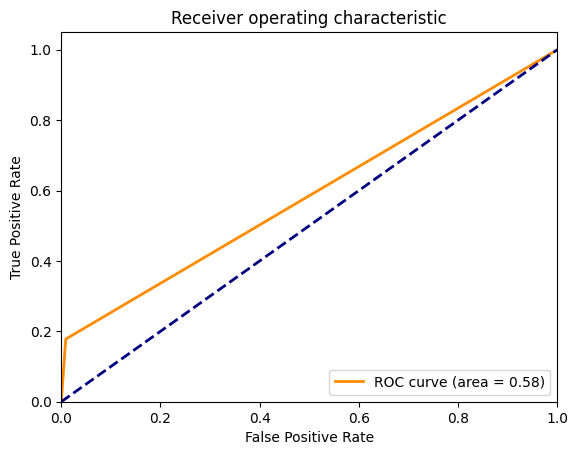

In [71]:
mini_testing = test_footprint_with_neg.sample(frac=0.001).reset_index(drop=True)
cr = Candidate_Ranking(light_fm_ann, model, lightfm_item_embedding, user_history)

y_scores = cr.predict_testing(
    mini_testing.user_id,
    mini_testing.item_id,
)
y_truths = mini_testing['count']
_, _, _ = draw_roc_curve(y_truths, y_scores)

### NCF Only Recommender Performance

100%|██████████████████████████████████████████████████████████████████████████████| 1373/1373 [01:28<00:00, 15.58it/s]

2/2 [==============================] - 0s 4ms/step


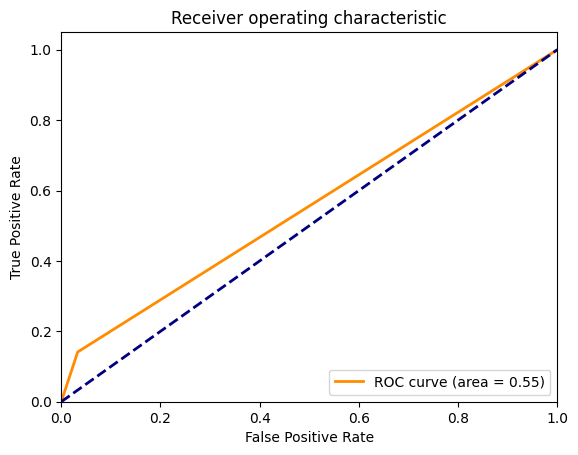

In [72]:
cr = Candidate_Ranking(ncf_item_ann, model, ncf_item_embedding, user_history)

y_scores = cr.predict_testing(
    mini_testing.user_id,
    mini_testing.item_id,
)
y_truths = mini_testing['count']
_, _, _ = draw_roc_curve(y_truths, y_scores)

### How-to-Use

In [29]:
import time
start_time = time.time()
cr = Candidate_Ranking(light_fm_ann, model, lightfm_item_embedding, user_history)
items_recommended = cr.recommend(39)
print(f"""Items such as: {items_recommended[:5]} were recommended to user 39
And it only took {time.time() - start_time:.3}s""")

Candidate Size: 6285
Items such as: [278547, 278562, 311404, 311435, 49323] were recommended to user 39
And it only took 0.615s
